In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
app_train.shape

(307511, 122)

In [6]:
class MissingandString:
    def __init__(self, X):
        self.X = X
        
    def num_missing(self,x):
        return sum(x.isnull())
    
    def element_str(self, x):
        return (type(x)==str)
    
    def missing_pandas(self,ax):
        miss_dt=self.X.apply(self.num_missing,axis=ax)
        return miss_dt
    
    def pandas_str(self):
        str_lt=[]
        for cols in self.X.columns:
            data=self.X[cols].apply(self.element_str)
            str_lt.append([data[data==True].index.tolist()])
    
        str_dt=pd.DataFrame(str_lt)
        str_dt["col"]=self.X.columns
        str_dt=str_dt.rename(columns={0:'lost'})
        str_dt["sum"]=str_dt["lost"].apply(lambda x :len(x))
        return (str_dt)


# Missing value each columns

In [7]:
eg=MissingandString(app_train)
print(eg.missing_pandas(0))

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

# Number of string values in each columns

In [8]:
print(eg.pandas_str())

                                                  lost  \
0                                                   []   
1                                                   []   
2    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
3    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
4    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
5    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
6                                                   []   
7                                                   []   
8                                                   []   
9                                                   []   
10                                                  []   
11   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
12   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
13   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
14   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
15   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
16            

# Descriptive Statistics For continous variable

In [9]:
app_train['AMT_ANNUITY'].sum()

8335859368.5

In [10]:
app_train['AMT_ANNUITY'].mean()

27108.573909183444

In [11]:
app_train['AMT_ANNUITY'].cumsum()

0         2.470050e+04
1         6.039900e+04
2         6.714900e+04
3         9.683550e+04
4         1.187010e+05
5         1.462185e+05
6         1.875195e+05
7         2.295945e+05
8         2.634210e+05
9         2.836710e+05
10        3.048480e+05
11        3.155265e+05
12        3.214080e+05
13        3.503745e+05
14        3.831525e+05
15        4.033125e+05
16        4.294620e+05
17        4.429620e+05
18        4.508370e+05
19        4.684005e+05
20        4.897755e+05
21        5.273370e+05
22        5.598585e+05
23        5.837085e+05
24        5.964120e+05
25        6.074865e+05
26        6.345630e+05
27        6.583905e+05
28        7.160670e+05
29        7.250670e+05
              ...     
307481    8.335138e+09
307482    8.335173e+09
307483    8.335189e+09
307484    8.335225e+09
307485    8.335234e+09
307486    8.335252e+09
307487    8.335283e+09
307488    8.335297e+09
307489    8.335320e+09
307490    8.335329e+09
307491    8.335361e+09
307492    8.335404e+09
307493    8

In [12]:
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [13]:
app_train['AMT_ANNUITY'].count()

307499

In [14]:
app_train['AMT_ANNUITY'].min()

1615.5

In [15]:
app_train['AMT_ANNUITY'].max()

258025.5

In [16]:
app_train['AMT_ANNUITY'].var()

210068421.35962632

In [17]:
app_train.corr() #continous

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,...,-0.009745,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,...,0.032748,0.020279,0.031640,-0.014486,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,...,0.013367,0.002364,-0.000045,0.003437,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,...,0.044498,0.003614,0.009015,0.027282,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,...,-0.040396,-0.010040,-0.010135,-0.008396,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988


In [18]:
app_train.cov()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.056582e+10,-5.904127e+01,-8.381982e+01,-4.436777e+07,-1.419730e+07,-6.449708e+05,-8.802091e+06,1.207224e+00,-6.727735e+05,1.984012e+07,...,4.698847e+00,4.192517e-01,2.482850e+00,5.313017e-01,-2.304033e+01,-2.497299e+01,4.417224e+01,45.722000,83.687998,895.504293
TARGET,-5.904127e+01,7.421192e-02,3.774480e-03,-2.572156e+02,-3.329871e+03,-5.060535e+01,-3.990170e+03,-1.402681e-04,9.301338e+01,-1.729247e+03,...,-1.945369e-04,-9.018809e-06,1.321271e-06,1.848698e-05,2.082225e-05,7.994510e-05,4.303294e-05,-0.003047,-0.000429,0.009943
CNT_CHILDREN,-8.381982e+01,3.774480e-03,5.214593e-01,2.205820e+03,6.235671e+02,2.237060e+02,-4.874046e+02,-2.554179e-04,1.042894e+03,-2.446582e+04,...,2.613594e-04,1.521749e-05,1.606428e-05,-3.237726e-05,-2.492105e-05,-2.938695e-05,-3.618439e-04,-0.007184,-0.004515,-0.056364
AMT_INCOME_TOTAL,-4.436777e+07,-2.572156e+02,2.205820e+03,5.622739e+10,1.497168e+10,6.587001e+08,1.398799e+10,2.453087e+02,2.820962e+07,-2.151468e+09,...,6.664529e+01,1.392615e+01,1.292048e+00,-2.554992e+00,1.477063e+01,8.099070e+01,1.213714e+02,5619.742206,958.417938,5427.589564
AMT_CREDIT,-1.419730e+07,-3.329871e+03,6.235671e+02,1.497168e+10,1.619988e+11,4.492695e+09,1.467708e+11,5.552370e+02,-9.737131e+07,-3.800575e+09,...,1.240755e+03,2.069314e+02,2.811662e+02,-1.189319e+02,-1.325779e+02,1.899996e+02,-1.056284e+02,20190.890033,5119.011266,-36660.699977
AMT_ANNUITY,-6.449708e+05,-5.060535e+01,2.237060e+02,6.587001e+08,4.492695e+09,2.100684e+08,4.150001e+09,2.374054e+01,5.974323e+05,-2.136346e+08,...,-1.268294e+01,1.616435e+00,3.824309e+00,-4.667345e+00,4.659010e+00,3.483036e+00,4.087934e+01,516.022963,115.677189,-304.483954
AMT_GOODS_PRICE,-8.802091e+06,-3.990170e+03,-4.874046e+02,1.398799e+10,1.467708e+11,4.150001e+09,1.364907e+11,5.290211e+02,-8.615999e+07,-3.385023e+09,...,1.086923e+03,1.827920e+02,2.633309e+02,-9.702120e+01,-1.008204e+02,1.924912e+02,-7.655799e+01,19203.110188,4847.839544,-35413.554555
REGION_POPULATION_RELATIVE,1.207224e+00,-1.402681e-04,-2.554179e-04,2.453087e+02,5.552370e+02,2.374054e+01,5.290211e+02,1.913043e-04,-1.785573e+00,-7.776613e+00,...,1.660221e-05,7.972667e-07,-1.397184e-08,8.698106e-07,-2.564171e-06,2.130196e-06,-6.045288e-06,0.000990,-0.000014,0.000026
DAYS_BIRTH,-6.727735e+05,9.301338e+01,1.042894e+03,2.820962e+07,-9.737131e+07,5.974323e+05,-8.615999e+07,-1.785573e+00,1.904440e+07,-3.796962e+08,...,1.743789e+01,3.846220e-01,8.858744e-01,2.178571e+00,1.909688e+00,1.076188e+00,-1.178121e+00,5.414437,-40.375077,-579.836968
DAYS_EMPLOYED,1.984012e+07,-1.729247e+03,-2.446582e+04,-2.151468e+09,-3.800575e+09,-2.136346e+08,-3.385023e+09,-7.776613e+00,-3.796962e+08,1.995884e+10,...,-5.124737e+02,-3.459042e+01,-3.224282e+01,-2.170448e+01,-5.601883e+01,7.381734e+00,8.871663e+01,-4453.033819,1719.069618,13183.404288


# Descriptive Statistics For categorical variable

In [19]:
app_train['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [20]:
app_train['OCCUPATION_TYPE'].isnull().sum()

96391

In [21]:
app_train['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [22]:
app_train.groupby(['NAME_CONTRACT_TYPE']).count()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,,,
Cash loans,278232,278232,278232,278232,278232,278232,278232,278232,278220,278232,...,278232,278232,278232,278232,240993,240993,240993,240993,240993,240993
Revolving loans,29279,29279,29279,29279,29279,29279,29279,29279,29279,29001,...,29279,29279,29279,29279,24999,24999,24999,24999,24999,24999


# Data Visualization 

In [23]:
app_train.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\Asus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


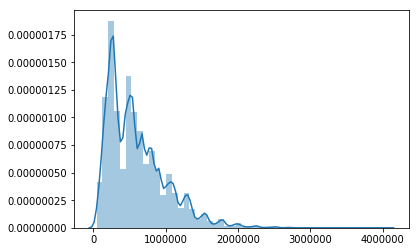

In [82]:
import seaborn as sns
sns.distplot(app_train['AMT_CREDIT'].values)

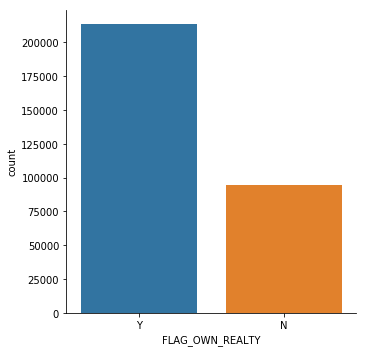

In [84]:
sns.catplot(x="FLAG_OWN_REALTY", kind="count", data=app_train);

# TRY

In [37]:
type(app_train['SK_ID_CURR'][0])
#app_train['NAME_CONTRACT_TYPE'].str.isnumeric()

numpy.int64

In [41]:
app_train.shape

(307511, 122)

In [91]:
np.sum(app_train['AMT_ANNUITY'].values)

nan